### Using Logistic regression, Random forest and deep learning to predict which employees are more likely to quit. Data collected by HR team on their employees is used to develop a model that could predict which employees are more likely to quit. Here's a sample of the dataset:

#### JobInvolvement
#### Education
#### JobSatisfaction
#### PerformanceRating
#### RelationshipSatisfaction
#### WorkLifeBalance

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
employee_df = pd.read_csv('Human_Resources.csv')


### Exploring the data

In [3]:
employee_df.info()
# 35 features in total, each contains 1470 data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Cleaning the data

In [5]:
# labelling categorical data
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda a : 1 if a == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda a : 1 if a == 'Y' else 0)
employee_df.OverTime = employee_df.OverTime.apply(lambda a : 1 if a == 'Yes' else 0)

In [6]:
#searching for mising data

employee_df.isnull().values.any()

False

In [7]:
employee_df.isna().values.any()

False

<Axes: >

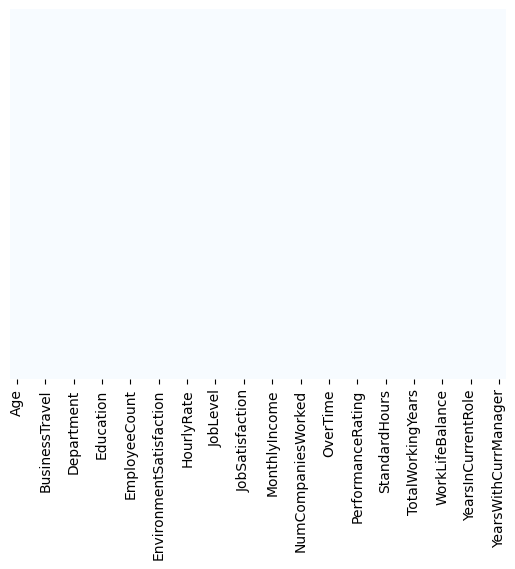

In [8]:
sns.heatmap(employee_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')



array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

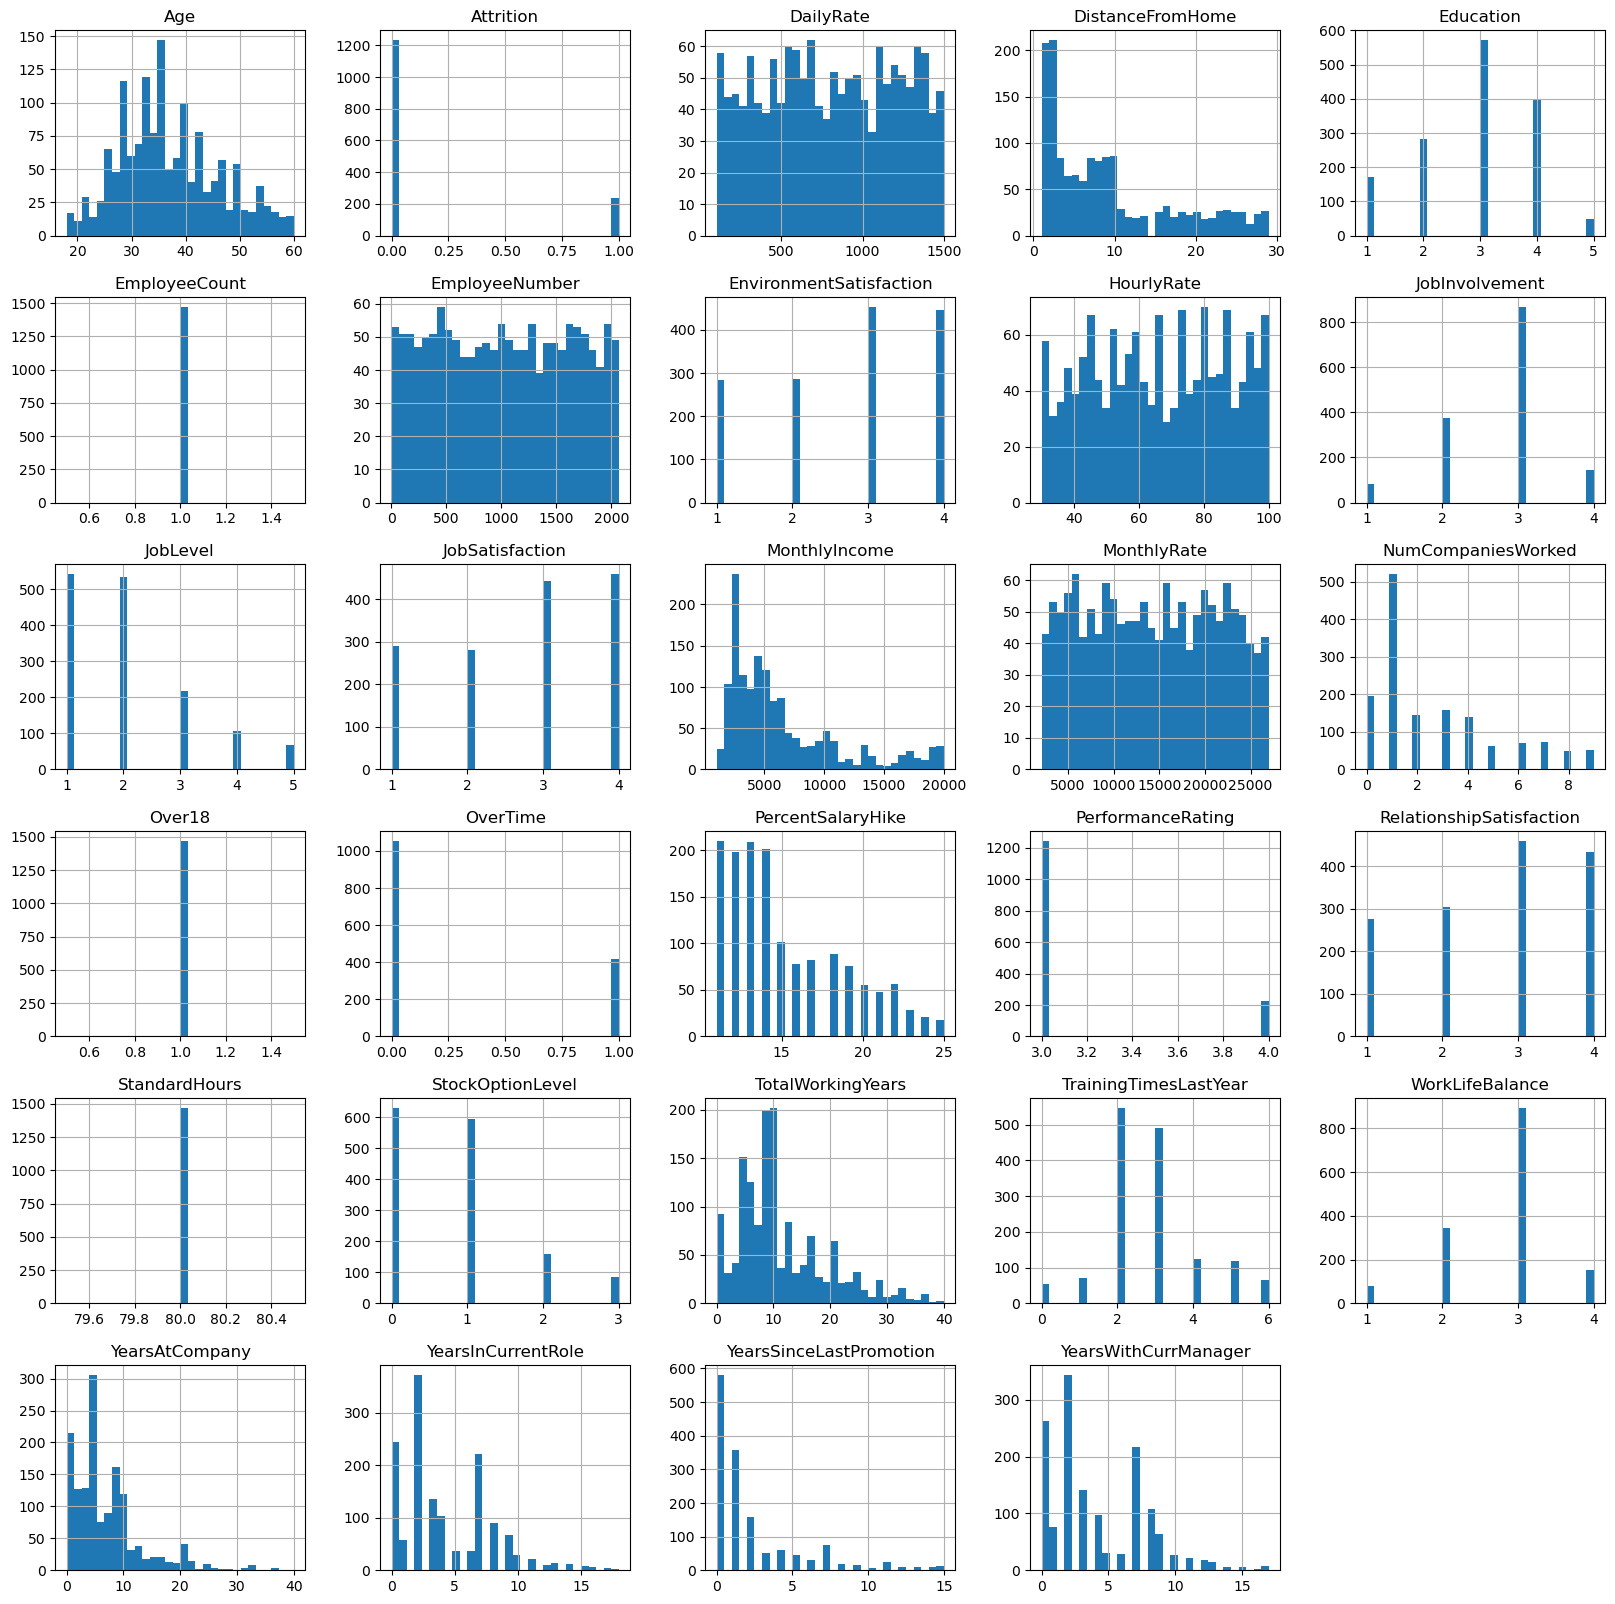

In [9]:
employee_df.hist(bins = 30, figsize = (20, 20))

In [10]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
employee_df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis = 1, inplace = True)

In [11]:
# Let's see how many employees left the company.

print(f'No. of employees who left the company : \
{employee_df[employee_df["Attrition"] == 1].count().head(1).values}')

print(f'No. of employees who did not leave the company : \
{employee_df[employee_df["Attrition"] == 0].count().head(1).values}')

No. of employees who left the company : [237]
No. of employees who did not leave the company : [1233]


In [12]:
left_df = employee_df[employee_df["Attrition"] == 1]
stayed_df = employee_df[employee_df["Attrition"] == 0]

In [13]:
print(f'No. of employees who left the company : {left_df.shape[0]}, i.e. \
{round(left_df.shape[0]/((left_df.shape[0] + stayed_df.shape[0])/100), 2)} %')
print(f'No. of employees who stayed in the company :{stayed_df.shape[0]}i.e. \
{round(stayed_df.shape[0]/((left_df.shape[0] + stayed_df.shape[0])/100), 2)} %')

No. of employees who left the company : 237, i.e. 16.12 %
No. of employees who stayed in the company :1233i.e. 83.88 %


C:\Users\iamni\AppData\Local\Temp\ipykernel_6092\2827659798.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = employee_df.corr()


<Axes: >

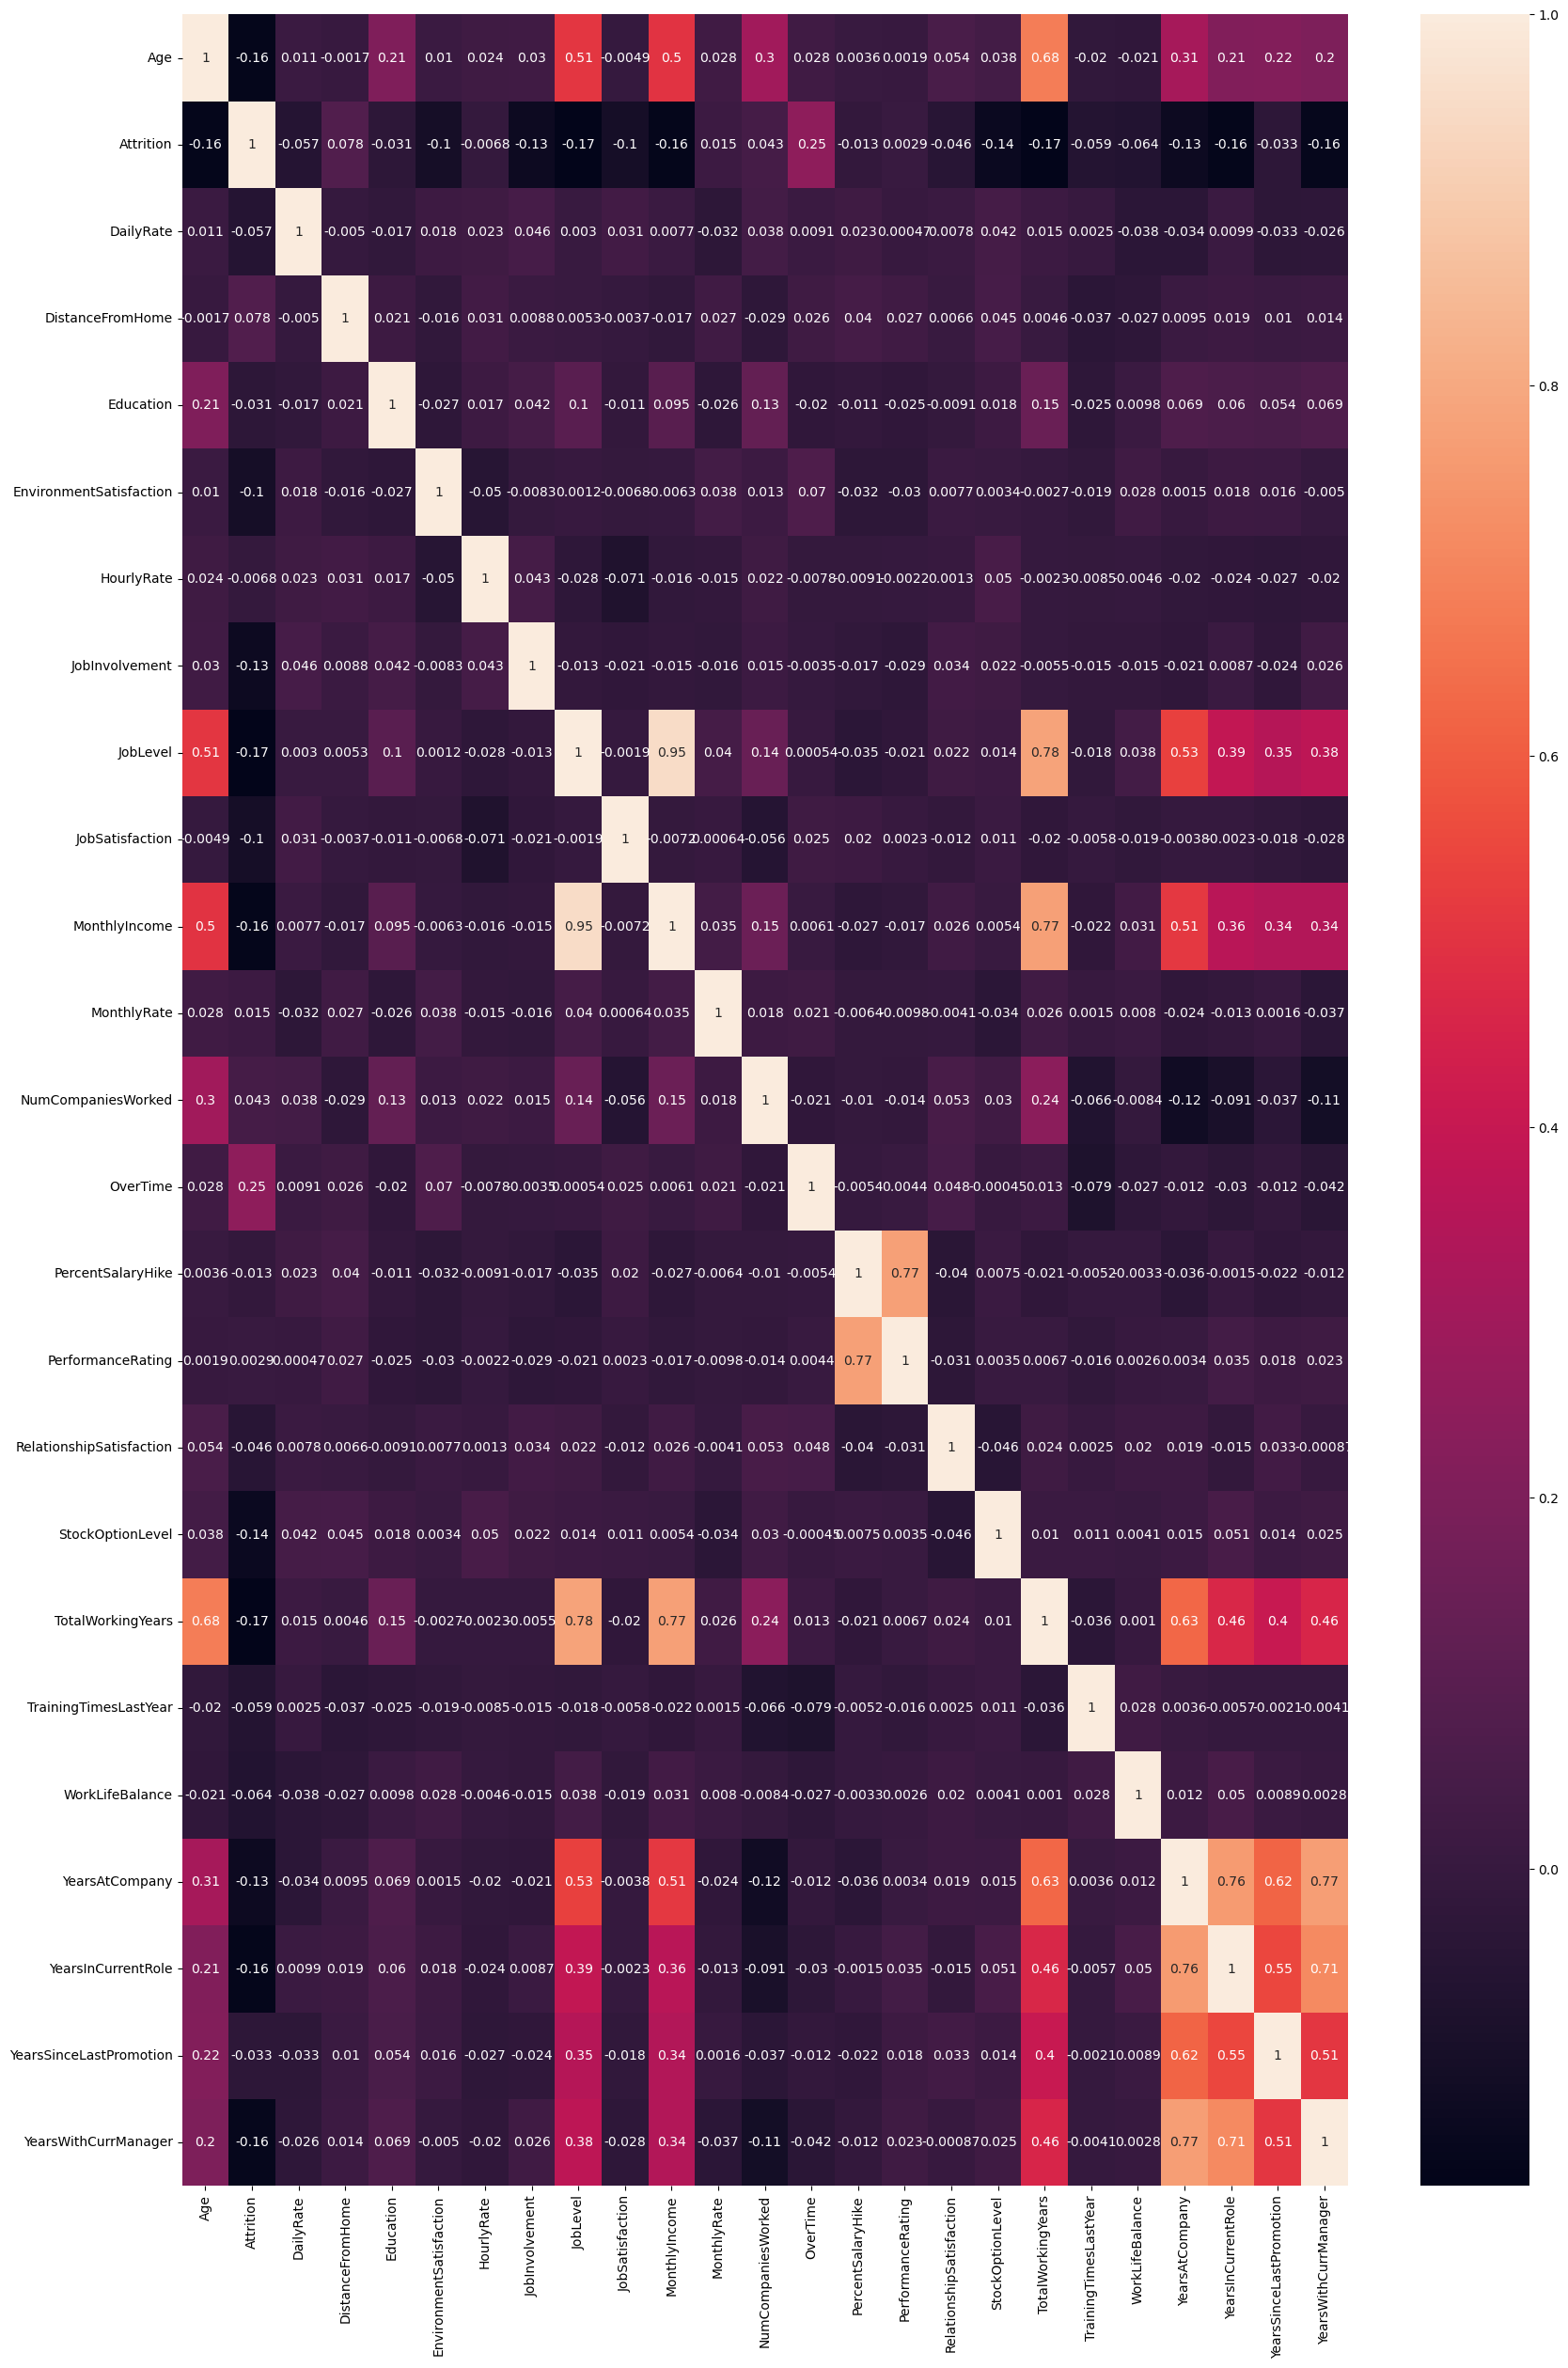

In [14]:
correlation = employee_df.corr()
f, ax = plt.subplots(figsize = (20, 30))
sns.heatmap(correlation, annot = True)


# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income

<Axes: xlabel='Age', ylabel='count'>

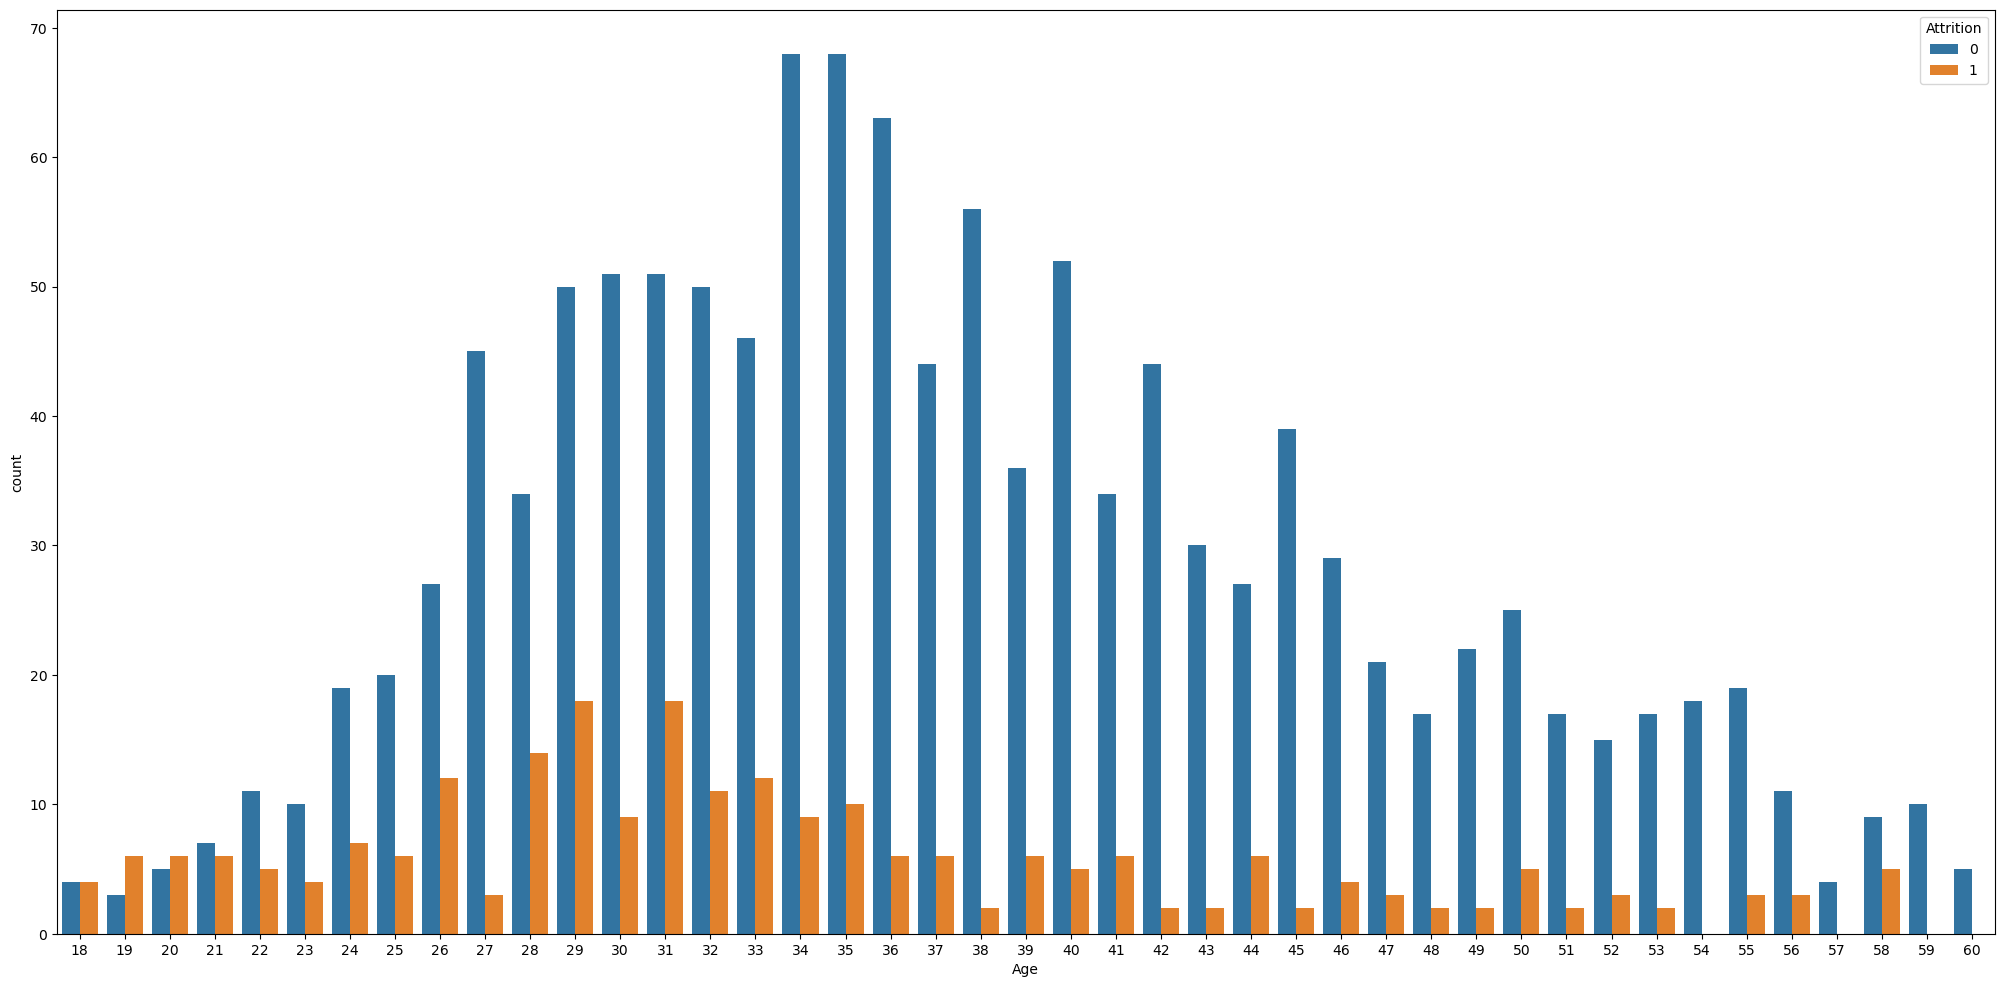

In [15]:
plt.figure(figsize = (25, 12))
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)

<Axes: xlabel='JobLevel', ylabel='count'>

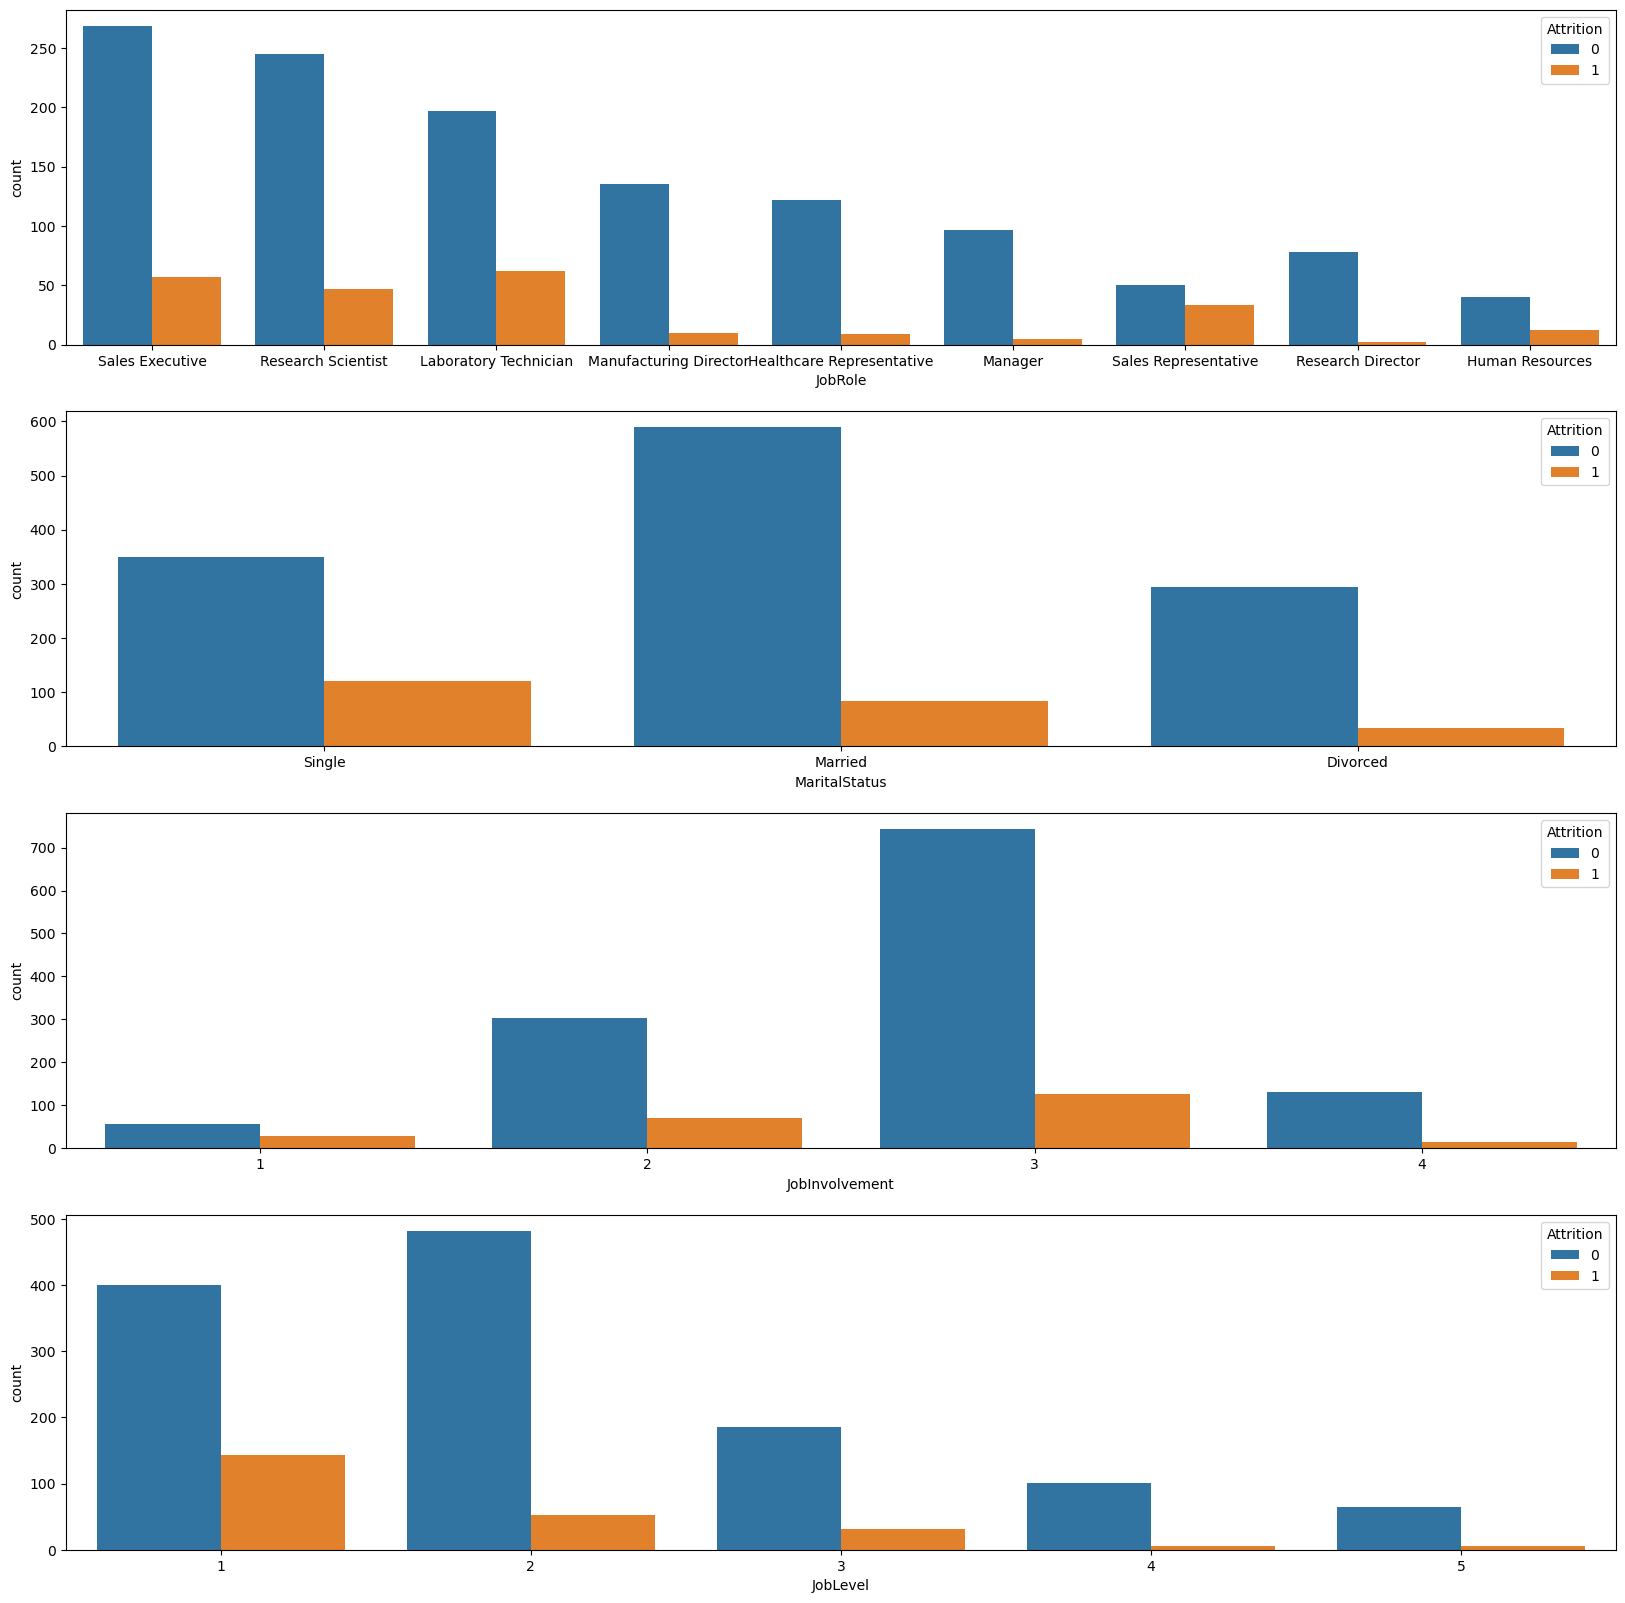

In [16]:
plt.figure(figsize = (20, 20))

plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)

plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)

plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)


# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

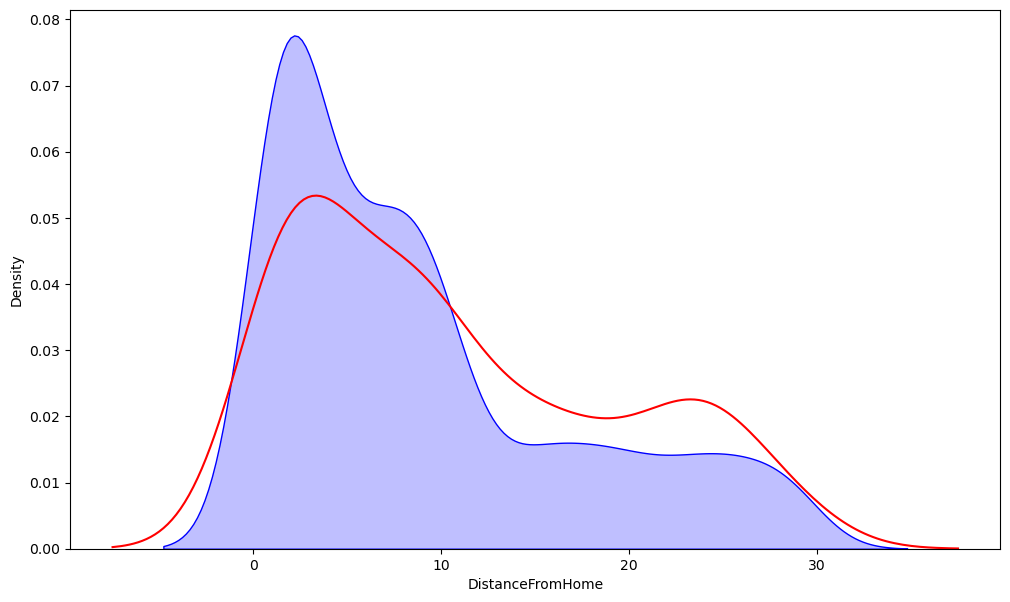

In [17]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', fill = False, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who left', fill = True, color = 'b')

<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

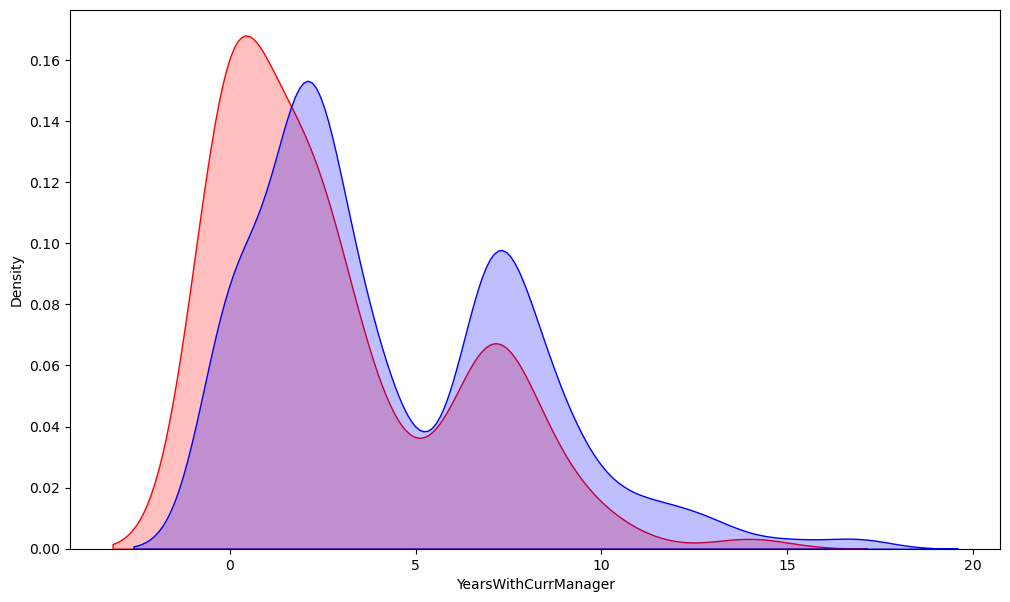

In [18]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', fill = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who stayed', fill = True, color = 'b')

<Axes: xlabel='TotalWorkingYears', ylabel='Density'>

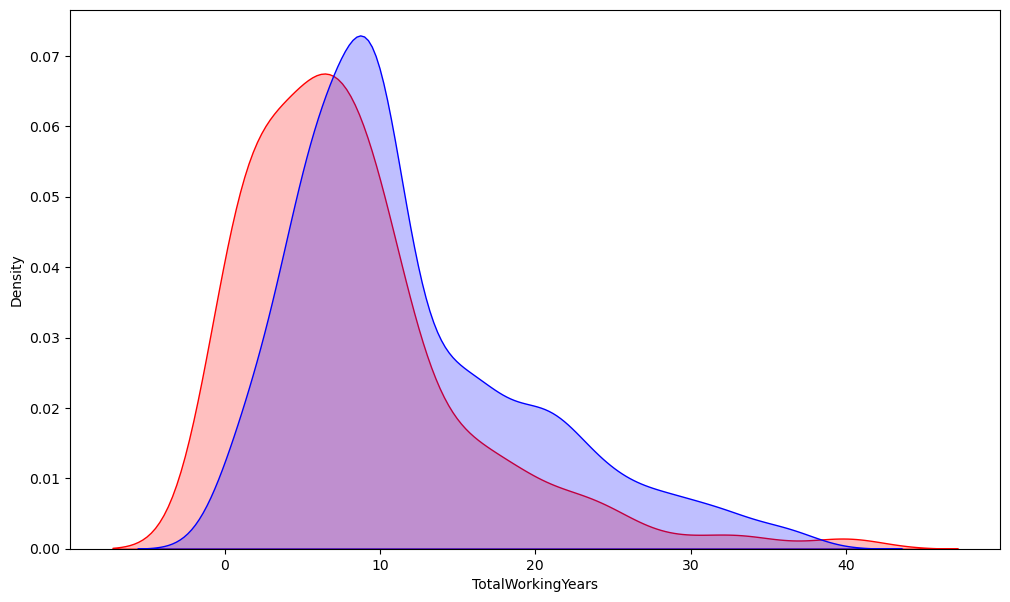

In [19]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', fill = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who stayed', fill = True, color = 'b')

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

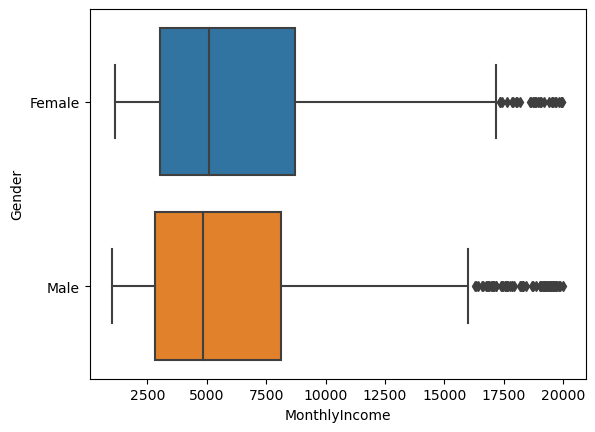

In [20]:
# The Gender vs. Monthly Income

sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df )

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

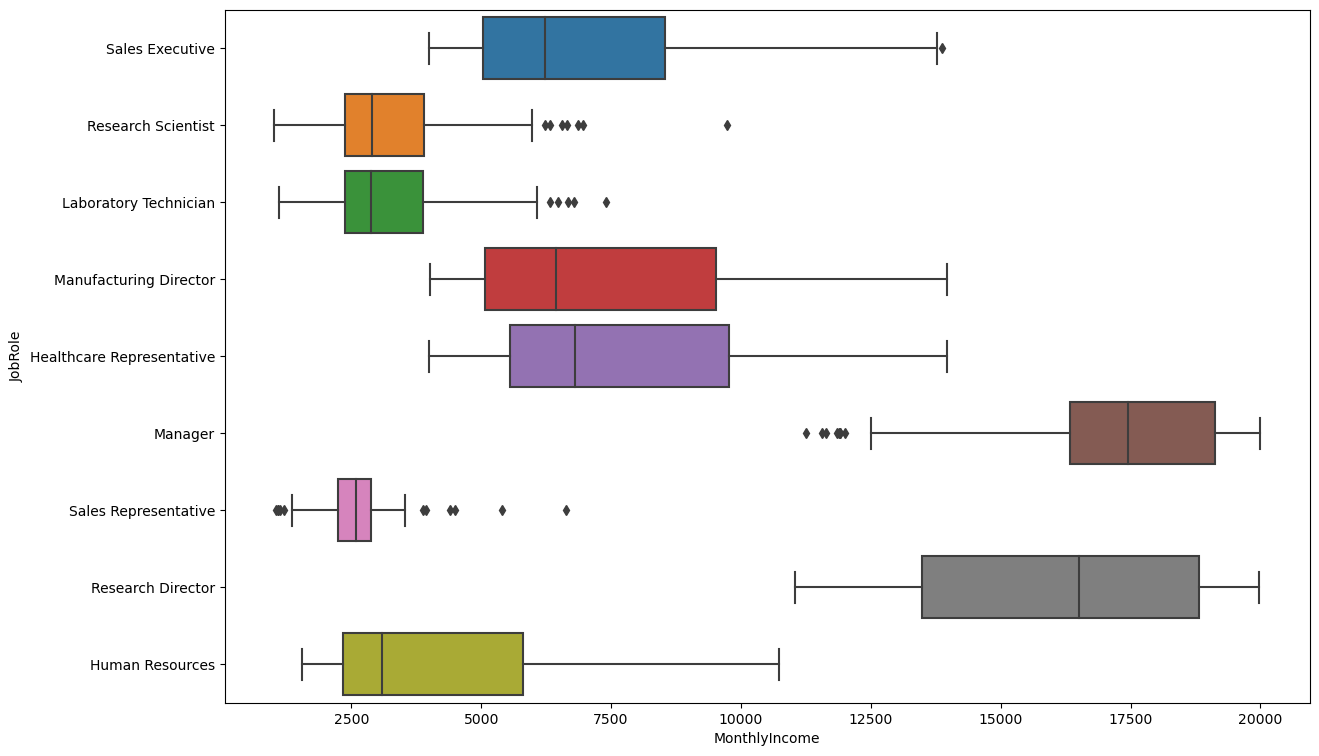

In [21]:
# The monthly income vs. job role

plt.figure(figsize = (14,9))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df )

### Data Cleaning

In [22]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [23]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder()
X_cat = oh_encoder.fit_transform(X_cat).toarray()
X_cat.shape

(1470, 26)

In [24]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
X_numerical = employee_df[['Age', 'DailyRate','DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [26]:
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [27]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all.shape

(1470, 50)

In [28]:
X_all.columns = X_all.columns.astype(str)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


### Scaling the data

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [30]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [31]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

### Test-train split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [33]:
X_train.shape

(1102, 50)

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [35]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
print("Accuracy of model:{:.3f} % " .format(100* accuracy_score(y_pred, y_test)))

Accuracy of model:89.674 % 


[[311  29]
 [  9  19]]


<Axes: >

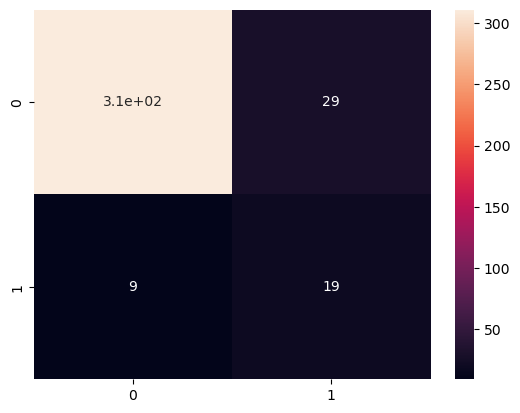

In [38]:
#checking model performance

cm = confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(cm , annot = True)

In [39]:
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       320
           1       0.68      0.40      0.50        48

    accuracy                           0.90       368
   macro avg       0.80      0.68      0.72       368
weighted avg       0.88      0.90      0.88       368



### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
rfc_y_pred = rfc.predict(X_test)

In [42]:
print("Accuracy of model:{:.3f} % " .format(100* accuracy_score(rfc_y_pred, y_test)))

Accuracy of model:87.228 % 


[[317  44]
 [  3   4]]


<Axes: >

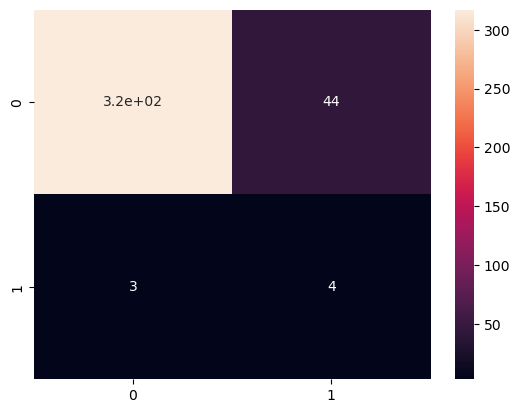

In [43]:
cm = confusion_matrix(rfc_y_pred, y_test)
print(cm)
sns.heatmap(cm , annot = True)

In [44]:
print(classification_report( y_test, rfc_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.57      0.08      0.15        48

    accuracy                           0.87       368
   macro avg       0.72      0.54      0.54       368
weighted avg       0.84      0.87      0.83       368



### Deep Learning

In [45]:
import tensorflow as tf

tf_model = tf.keras.models.Sequential()
tf_model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (50,)))
tf_model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
tf_model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
tf_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [46]:
tf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [47]:
tf_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
epoch_hist = tf_model.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 [==============================] - 1s 6ms/step - loss: 0.4388 - accuracy: 0.8194
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3497 - accuracy: 0.8639
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3160 - accuracy: 0.8675
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2860 - accuracy: 0.8929
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2715 - accuracy: 0.8938
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2293 - accuracy: 0.9174
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2479 - accuracy: 0.9065
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2173 - accuracy: 0.9138
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.1832 - accuracy: 0.9383
Epoch 10/100
23/23 [==============================] - 0s 6ms/step - loss: 0.1601 - accuracy: 0.9383
Epoch 11/

23/23 [==============================] - 0s 6ms/step - loss: 1.6105e-05 - accuracy: 1.0000
Epoch 81/100
23/23 [==============================] - 0s 6ms/step - loss: 1.5607e-05 - accuracy: 1.0000
Epoch 82/100
23/23 [==============================] - 0s 6ms/step - loss: 1.5102e-05 - accuracy: 1.0000
Epoch 83/100
23/23 [==============================] - 0s 7ms/step - loss: 1.4650e-05 - accuracy: 1.0000
Epoch 84/100
23/23 [==============================] - 0s 6ms/step - loss: 1.4122e-05 - accuracy: 1.0000
Epoch 85/100
23/23 [==============================] - 0s 7ms/step - loss: 1.3655e-05 - accuracy: 1.0000
Epoch 86/100
23/23 [==============================] - 0s 6ms/step - loss: 1.3249e-05 - accuracy: 1.0000
Epoch 87/100
23/23 [==============================] - 0s 6ms/step - loss: 1.2732e-05 - accuracy: 1.0000
Epoch 88/100
23/23 [==============================] - 0s 8ms/step - loss: 1.2319e-05 - accuracy: 1.0000
Epoch 89/100
23/23 [==============================] - 0s 9ms/step - loss: 1.1

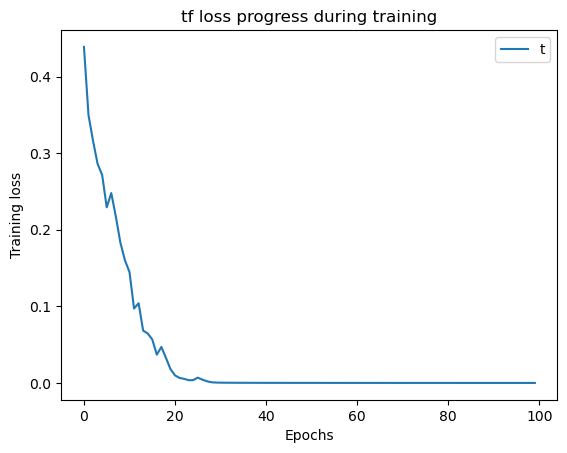

In [49]:
#plt.figure(figsize = (15, 1))
plt.plot(epoch_hist.history['loss'])
plt.title('tf loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend('training loss')

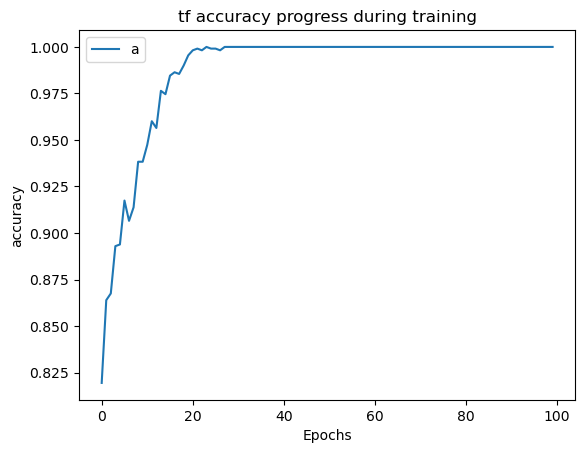

In [50]:
plt.plot(epoch_hist.history['accuracy'])
plt.title('tf accuracy progress during training')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend('accuracy')

In [51]:
tf_y_pred = tf_model.predict(X_test)
tf_y_pred = (tf_y_pred > 0.5)
tf_y_pred

12/12 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [52]:
print("Accuracy of model:{:.3f} % " .format(100* accuracy_score(tf_y_pred, y_test)))

Accuracy of model:87.500 % 


[[301  27]
 [ 19  21]]


<Axes: >

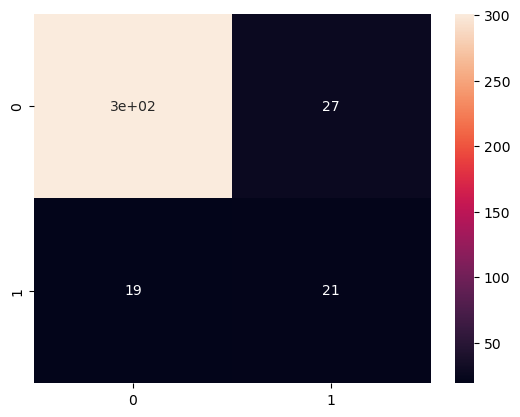

In [53]:
cm = confusion_matrix(tf_y_pred, y_test)
print(cm)
sns.heatmap(cm , annot = True)

In [54]:
print(classification_report( y_test, tf_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       320
           1       0.53      0.44      0.48        48

    accuracy                           0.88       368
   macro avg       0.72      0.69      0.70       368
weighted avg       0.87      0.88      0.87       368

